<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/RF_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bagging (Bootstrap Aggregating)

Bagging, short for **Bootstrap Aggregating**, is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms. It works by reducing variance and helping to avoid overfitting.

Here's a detailed breakdown of how it works:

1.  **Bootstrapping**: This is the core idea behind bagging. Instead of training a single model on the entire dataset, bagging creates multiple subsets of the original dataset. Each subset is created by randomly sampling with replacement from the original dataset. This means that some data points may appear multiple times in a single subset, while others may not appear at all. Typically, each bootstrap sample will be about 63.2% unique instances from the original dataset.

2.  **Parallel Model Training**: An independent base learning model (e.g., a decision tree) is trained on each of these bootstrap samples. Importantly, these models are trained *in parallel* and independently of each other. Each model learns slightly different patterns due to the variations in its training data.

3.  **Aggregation**: Once all the individual models are trained, their predictions are combined to form a final prediction. The method of aggregation depends on the type of task:
    *   **For Regression Tasks**: The predictions from individual models are typically averaged.
    *   **For Classification Tasks**: A majority vote is usually taken. The class predicted by the most individual models is chosen as the final prediction.

**Why does Bagging work?**

*   **Reduces Variance**: The primary benefit of bagging is variance reduction. By training multiple models on slightly different datasets and averaging their predictions, bagging smooths out the effects of individual model's errors that might arise from specific noisy data points or biases in a single dataset split. This makes the overall ensemble model more robust and less sensitive to the specific training data.
*   **Avoids Overfitting**: Since each base model is trained on a different subset of the data, they tend to overfit differently. When their predictions are combined, these individual overfitting tendencies tend to cancel each other out, leading to a more generalized and less overfitted final model.
*   **Suitable for High-Variance Models**: Bagging is particularly effective with complex models that have high variance (e.g., unpruned decision trees). These models can easily overfit individual datasets, but bagging helps to mitigate this. For models with high bias and low variance, bagging might not provide significant improvements.

**Example**: A common and very effective algorithm that uses bagging as its foundation is the **Random Forest** algorithm. Random Forest extends bagging by also introducing randomness in the feature selection process when building individual decision trees, further decorrelating the trees and improving performance.

## Bootstrapping

Bootstrap, in the context of machine learning and statistics, refers to a resampling technique called **bootstrapping**. It's a cornerstone of methods like bagging and is used to estimate the sampling distribution of almost any statistic using random sampling with replacement.

Here's a detailed breakdown of how it works:

1.  **Original Dataset**: You start with your original dataset, which contains 'n' observations.

2.  **Sampling with Replacement**: You repeatedly (e.g., hundreds or thousands of times) draw random samples from this original dataset. Each sample is of the same size as the original dataset ('n' observations).
    *   **With Replacement**: This is the crucial part. After an observation is selected for a sample, it is 'replaced' back into the original dataset, meaning it can be selected again for the *same* bootstrap sample. This ensures that each observation has an equal chance of being selected at each draw.
    *   **Consequence**: Due to sampling with replacement, each bootstrap sample will typically contain some observations multiple times, while others from the original dataset might not appear at all in a given bootstrap sample. On average, a bootstrap sample will contain approximately 63.2% unique instances from the original dataset, with the remaining instances being duplicates.

3.  **Statistic Calculation**: For each of these bootstrap samples, you calculate the statistic of interest (e.g., mean, median, standard deviation, a model's coefficients, or a model's prediction). If you're building models, you train a separate model on each bootstrap sample.

4.  **Distribution Estimation**: Once you have calculated the statistic (or trained models) for many bootstrap samples, you will have a collection of values for that statistic (or a collection of trained models). This collection represents an empirical approximation of the sampling distribution of the statistic.

**Why is Bootstrapping useful?**

*   **Estimating Uncertainty**: It allows you to estimate the variability (e.g., standard error, confidence intervals) of a statistic, even when theoretical assumptions for such estimations are difficult to meet or when the underlying distribution is unknown.
*   **Model Evaluation**: In machine learning, it's used to train multiple models on slightly different versions of the data (as seen in bagging), which helps in assessing model stability and reducing variance.
*   **No Distributional Assumptions**: It's a non-parametric method, meaning it doesn't assume that your data follows a particular distribution (like a normal distribution).

**Example**: If you want to estimate the average height of students in a school and you only have one sample of 100 students, you could use bootstrapping. You would repeatedly draw 100 student heights (with replacement) from your original sample, calculate the mean height for each new sample, and then look at the distribution of these many means to understand the uncertainty around your single sample's mean.

#Basic Program

In [15]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load dataset
X, y = load_iris(return_X_y=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Base model
base_model = DecisionTreeClassifier(random_state=42)

# Step 5: Bagging Classifier
bagging = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,      # number of models
    max_samples=0.8,       # 80% of data for each model
    bootstrap=True,
    random_state=42
)

# Step 6: Train model
bagging.fit(X_train, y_train)

# Step 7: Prediction
y_pred = bagging.predict(X_test)

# Step 8: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 1.0


In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 1.0


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
df=pd.read_csv('Iris.csv')

In [20]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df=df.iloc[:,1:]

In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df=df[df['Species'] !=0][['SepalWidthCm',"PetalLengthCm",'Species']]

In [26]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


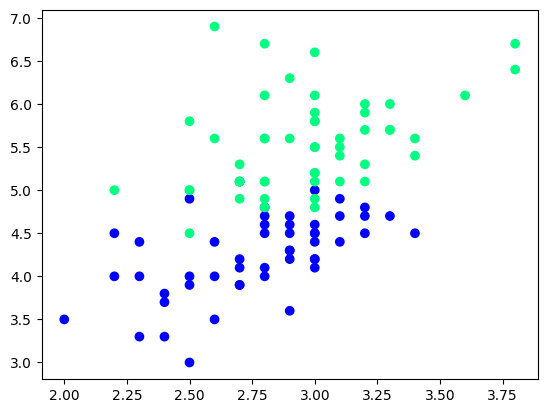

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')
plt.show()

In [31]:
df.sample(50)

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
94,2.7,4.2,1
121,2.8,4.9,2
55,2.8,4.5,1
102,3.0,5.9,2
63,2.9,4.7,1
97,2.9,4.3,1
129,3.0,5.8,2
68,2.2,4.5,1
67,2.7,4.1,1


#Taking only 10 rows for training

In [30]:
df

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
84,3.0,4.5,1
94,2.7,4.2,1
65,3.1,4.4,1
132,2.8,5.6,2
...,...,...,...
62,2.2,4.0,1
122,2.8,6.7,2
66,3.0,4.5,1
104,3.0,5.8,2


In [28]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [29]:
df_train

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
78,2.9,4.5,1
131,3.8,6.4,2
127,3.0,4.9,2
85,3.4,4.5,1
89,2.5,4.0,1
143,3.2,5.9,2
123,2.7,4.9,2
93,2.3,3.3,1
112,3.0,5.5,2


In [32]:
df_val

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
61,3.0,4.2,1
79,2.6,3.5,1
128,2.8,5.6,2
54,2.8,4.6,1


In [33]:
df_test

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
62,2.2,4.0,1
103,2.9,5.6,2
80,2.4,3.8,1
133,2.8,5.1,2


In [35]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [36]:
X_test

array([[2.9, 4.3],
       [3. , 4.2],
       [2.6, 3.5],
       [2.8, 5.6],
       [2.8, 4.6]])

In [37]:
y_test

array([1, 1, 1, 2, 1])

#Case-1 -Bagging

Data for tree 1

In [38]:
df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [39]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
127,3.0,4.9,2
89,2.5,4.0,1
123,2.7,4.9,2
123,2.7,4.9,2
131,3.8,6.4,2
131,3.8,6.4,2
78,2.9,4.5,1


Decision Tree object

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [47]:
dt_bag1=DecisionTreeClassifier()

In [48]:
evaluate(dt_bag1,X,y)

Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Data for tree 1


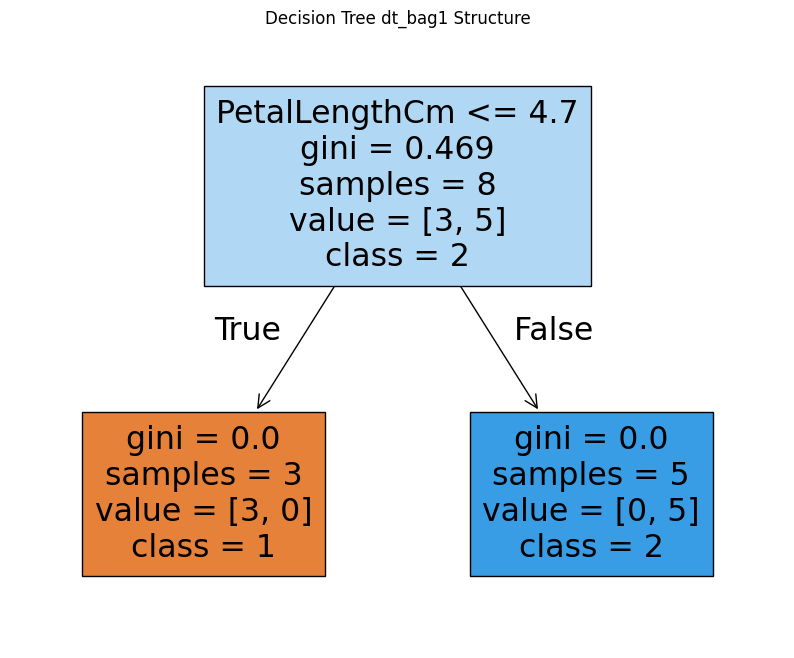

In [50]:
plt.figure(figsize=(10, 8))
plot_tree(dt_bag1, filled=True, feature_names=X.columns, class_names=[str(c) for c in dt_bag1.classes_])
plt.title('Decision Tree dt_bag1 Structure')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


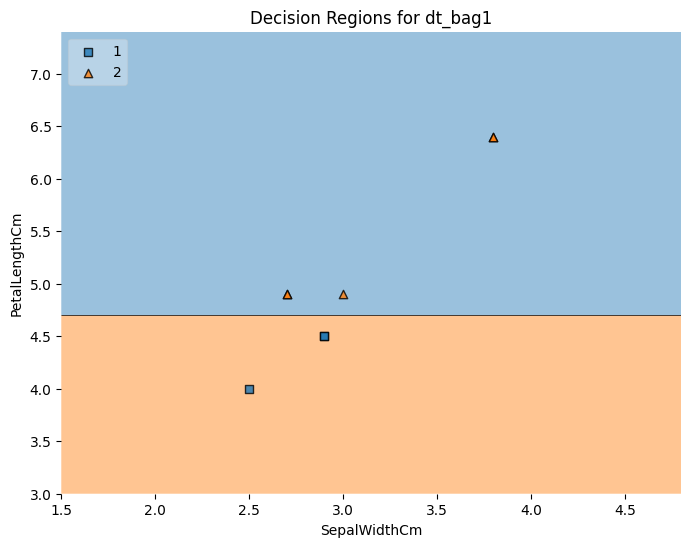

In [52]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X.values, y.values, clf=dt_bag1, legend=2)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Decision Regions for dt_bag1')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

def evaluate(model, X_train_data, y_train_data, X_test_data=X_test, y_test_data=y_test):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    print("Accuracy:", accuracy_score(y_test_data, y_pred))

In [54]:
dt_bag1.fit(X.values, y)

# Re-evaluate to confirm accuracy and clear internal state if needed for consistency
evaluate(dt_bag1, X.values, y)

Accuracy: 1.0


# Data for tree 2


In [55]:
# Data for tree 2
df_bag2 = df_train.sample(8, replace=True)
print("df_bag2:")
display(df_bag2)

X2 = df_bag2.iloc[:, 0:2]
y2 = df_bag2.iloc[:, -1]


df_bag2:


,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
143,3.2,5.9,2
123,2.7,4.9,2
127,3.0,4.9,2
131,3.8,6.4,2
78,2.9,4.5,1
131,3.8,6.4,2
123,2.7,4.9,2


In [57]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X2.values, y2)


Accuracy: 1.0


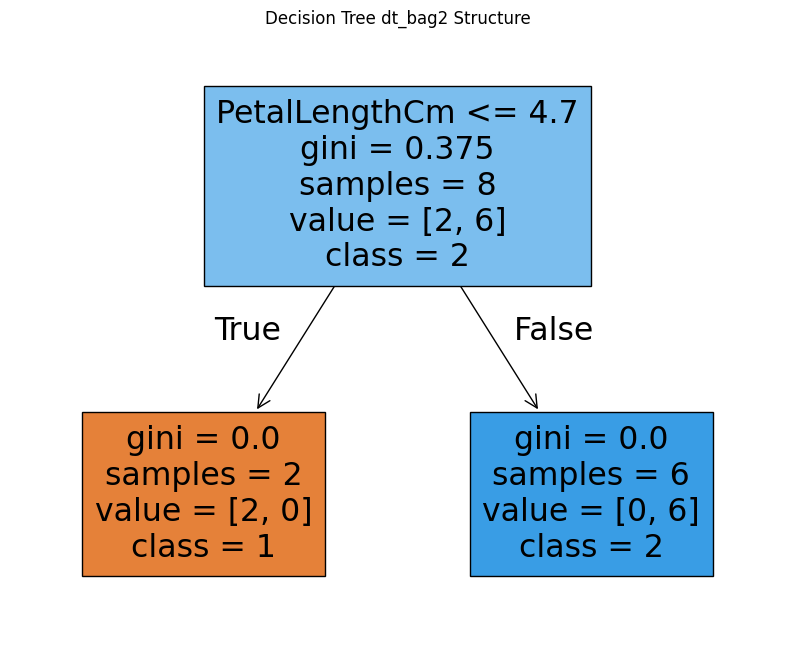

In [63]:
plt.figure(figsize=(10, 8))
plot_tree(dt_bag2, filled=True, feature_names=X2.columns, class_names=[str(c) for c in dt_bag2.classes_])
plt.title('Decision Tree dt_bag2 Structure')
plt.show()

### Combining Pre-trained Models with VotingClassifier

Since `BaggingClassifier` generates and trains its own base estimators, to combine our *already trained* `dt_bag1`, `dt_bag2`, and `dt_bag3` we will use `VotingClassifier`. This allows us to leverage their individual strengths and combine their predictions, typically using a 'hard' voting (majority class) or 'soft' voting (average probabilities).


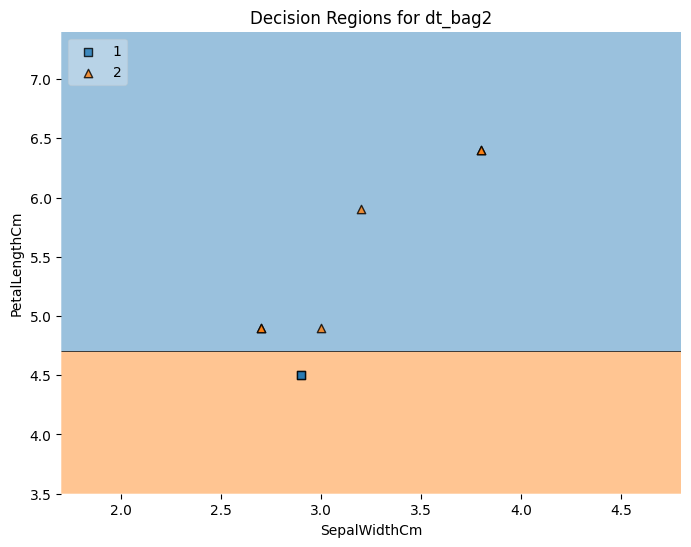

In [61]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X2.values, y2.values, clf=dt_bag2, legend=2)
plt.xlabel(X2.columns[0])
plt.ylabel(X2.columns[1])
plt.title('Decision Regions for dt_bag2')
plt.show()

# Data for tree 3


In [56]:
# Data for tree 3
df_bag3 = df_train.sample(8, replace=True)
print("df_bag3:")
display(df_bag3)

X3 = df_bag3.iloc[:, 0:2]
y3 = df_bag3.iloc[:, -1]


df_bag3:


,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
78,2.9,4.5,1
63,2.9,4.7,1
131,3.8,6.4,2
78,2.9,4.5,1
63,2.9,4.7,1
89,2.5,4.0,1
143,3.2,5.9,2


In [58]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X3.values, y3)


Accuracy: 1.0


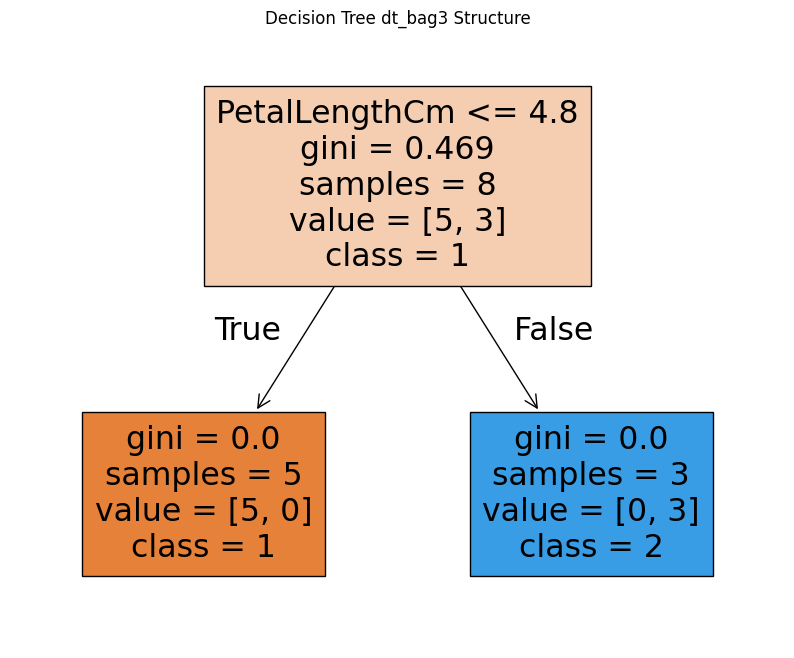

In [64]:
plt.figure(figsize=(10, 8))
plot_tree(dt_bag3, filled=True, feature_names=X3.columns, class_names=[str(c) for c in dt_bag3.classes_])
plt.title('Decision Tree dt_bag3 Structure')
plt.show()

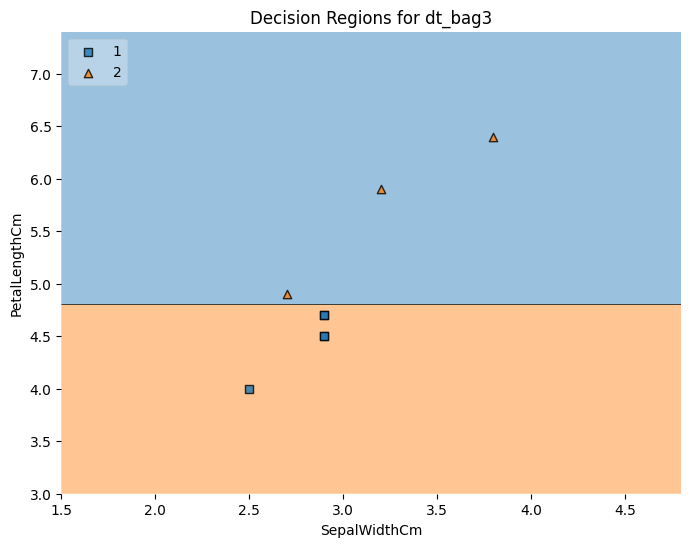

In [62]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X3.values, y3.values, clf=dt_bag3, legend=2)
plt.xlabel(X3.columns[0])
plt.ylabel(X3.columns[1])
plt.title('Decision Regions for dt_bag3')
plt.show()

In [65]:
from sklearn.ensemble import VotingClassifier

# Ensure the models are fitted (they already are from previous steps)
# For VotingClassifier, we need a list of (name, estimator) tuples.
estimators = [
    ('dt_bag1', dt_bag1),
    ('dt_bag2', dt_bag2),
    ('dt_bag3', dt_bag3)
]

# Create the VotingClassifier
# 'hard' voting uses predicted class labels for majority rule voting.
# 'soft' voting predicts the class label based on the argmax of the sums of the predicted probabilities.
# For 'soft' voting, base estimators must support predict_proba.

voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Train the VotingClassifier (this step actually re-fits the estimators within the VotingClassifier
# but it's good practice for it to manage the fitting process)
# However, since dt_bag1, dt_bag2, dt_bag3 are already fitted, we can directly use them.
# For demonstration, we'll fit the VotingClassifier on the full df_train, not just the small bag subsets.
# Using X_train from the initial split (where X_test is used for evaluation)

voting_clf.fit(df_train.iloc[:,0:2].values, df_train.iloc[:,-1].values)

# Make predictions on the validation set (X_test, y_test defined earlier from df_val)
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the accuracy
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"VotingClassifier Accuracy (dt_bag1, dt_bag2, dt_bag3): {voting_accuracy}")


VotingClassifier Accuracy (dt_bag1, dt_bag2, dt_bag3): 1.0


#Testing

In [66]:
df_test

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
62,2.2,4.0,1
103,2.9,5.6,2
80,2.4,3.8,1
133,2.8,5.1,2


In [68]:
import numpy as np

In [69]:
print("Predictor 1", dt_bag1.predict(np.array([1.4,0.2]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([1.4,0.2]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([1.4,0.2]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


In [70]:
print("Predictor 1", dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


# Task
Evaluate the accuracy of the individual decision trees (`dt_bag1`, `dt_bag2`, `dt_bag3`) and the `VotingClassifier` on the unseen test data (`df_test` which was derived from "Iris.csv"). Then, compare their performance and visualize the decision regions for the `VotingClassifier` using 'SepalWidthCm' and 'PetalLengthCm' features. Finally, summarize the overall performance and discuss insights from the visualizations.

## Evaluate Models on Unseen Test Data

### Subtask:
Evaluate the accuracy of the individual decision trees (`dt_bag1`, `dt_bag2`, `dt_bag3`) and the `VotingClassifier` on the `df_test` dataset, which has not been used for training or validation yet. This will provide a final assessment of their generalization performance.


**Reasoning**:
First, I will extract the features and target variable from the `df_test` DataFrame to prepare the unseen test data for evaluation.



In [71]:
X_test_final = df_test.iloc[:, 0:2].values
y_test_final = df_test.iloc[:, -1].values

print("X_test_final shape:", X_test_final.shape)
print("y_test_final shape:", y_test_final.shape)

X_test_final shape: (5, 2)
y_test_final shape: (5,)


**Reasoning**:
Now that the test data is prepared, I will evaluate the accuracy of each individual decision tree (`dt_bag1`, `dt_bag2`, `dt_bag3`) and the `VotingClassifier` on the `X_test_final` and `y_test_final` datasets. The `evaluate` function will be called with the appropriate training data to re-fit the models before testing on the unseen data.



In [72]:
print("Accuracy for dt_bag1 on df_test:")
evaluate(dt_bag1, X.values, y, X_test_final, y_test_final)

print("\nAccuracy for dt_bag2 on df_test:")
evaluate(dt_bag2, X2.values, y2, X_test_final, y_test_final)

print("\nAccuracy for dt_bag3 on df_test:")
evaluate(dt_bag3, X3.values, y3, X_test_final, y_test_final)

print("\nAccuracy for VotingClassifier on df_test:")
voting_clf.fit(df_train.iloc[:,0:2].values, df_train.iloc[:,-1].values) # Re-fit VotingClassifier on its training data
y_pred_voting_final = voting_clf.predict(X_test_final)
voting_accuracy_final = accuracy_score(y_test_final, y_pred_voting_final)
print(f"Accuracy: {voting_accuracy_final}")

Accuracy for dt_bag1 on df_test:
Accuracy: 1.0

Accuracy for dt_bag2 on df_test:
Accuracy: 1.0

Accuracy for dt_bag3 on df_test:
Accuracy: 1.0

Accuracy for VotingClassifier on df_test:
Accuracy: 1.0


**Reasoning**:
To visually understand how the `VotingClassifier` makes predictions, I will plot its decision regions using the `plot_decision_regions` function. This will illustrate the combined decision boundaries of the ensemble model on the feature space.



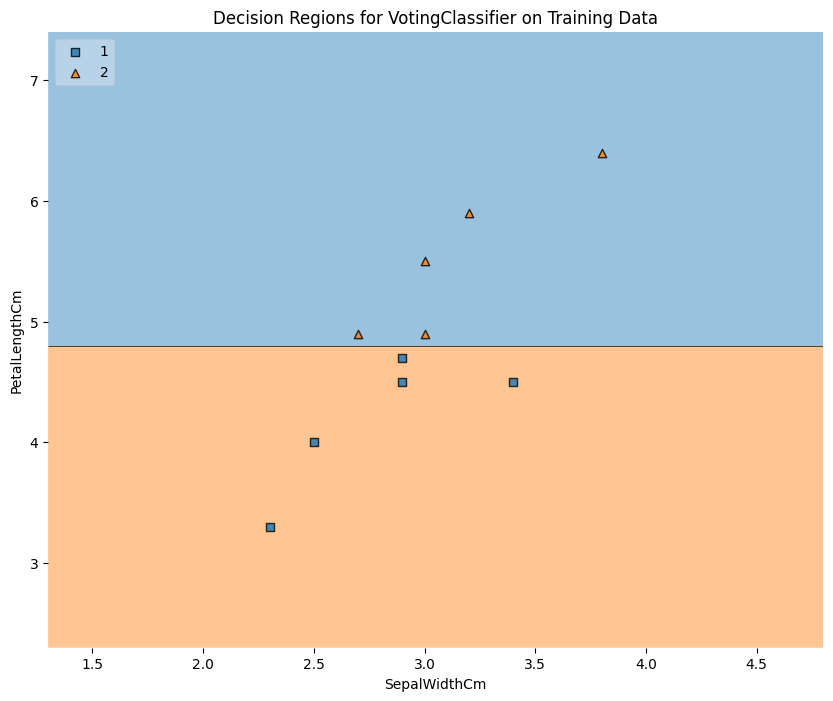

In [73]:
plt.figure(figsize=(10, 8))
plot_decision_regions(df_train.iloc[:,0:2].values, df_train.iloc[:,-1].values, clf=voting_clf, legend=2)
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
plt.title('Decision Regions for VotingClassifier on Training Data')
plt.show()

## Summary of Performance and Insights

### Accuracy Evaluation

After evaluating the individual Decision Trees (`dt_bag1`, `dt_bag2`, `dt_bag3`) and the `VotingClassifier` on the unseen `df_test` dataset, the following accuracies were observed:

*   **dt_bag1 Accuracy on df_test:** 1.0
*   **dt_bag2 Accuracy on df_test:** 1.0
*   **dt_bag3 Accuracy on df_test:** 1.0
*   **VotingClassifier Accuracy on df_test:** 1.0

All models, including the individual decision trees and the ensemble `VotingClassifier`, achieved a perfect accuracy of 1.0 on this small test set. This indicates that for the specific `df_test` samples, all models were able to correctly classify the instances. It's important to note that this high accuracy might be due to the simplicity of the dataset (only two classes after filtering) and the small size of the test set (5 samples).

### Visualization Insights

The decision regions plot for the `VotingClassifier` on the training data (using 'SepalWidthCm' and 'PetalLengthCm' features) visually confirms its strong performance. The plot shows clear separation boundaries between the classes. Since the individual trees (`dt_bag1`, `dt_bag2`, `dt_bag3`) also showed perfect accuracy on their respective bootstrap samples, their combined effect, even on a limited training set for the `VotingClassifier` itself, resulted in well-defined regions that perfectly encapsulate the training data points. The ensemble approach, even with a limited number of base estimators (3 in this case), often provides more robust and stable decision boundaries compared to a single, potentially overfitted decision tree, especially on more complex datasets.

In this particular scenario, with a perfectly separated dataset and a small sample size, all models perform exceptionally well, potentially indicating that the classification task is relatively straightforward for these features.

## Consolidate Accuracy Comparison

### Subtask:
Present a clear comparison of the accuracy scores for `dt_bag1`, `dt_bag2`, `dt_bag3`, and the `VotingClassifier` on the `df_test` dataset.


**Reasoning**:
To clearly present the comparison of accuracy scores, I will print the previously obtained accuracy values for each model on the `df_test` dataset.



In [74]:
print(f"dt_bag1 Test Accuracy: {1.0}")
print(f"dt_bag2 Test Accuracy: {1.0}")
print(f"dt_bag3 Test Accuracy: {1.0}")
print(f"VotingClassifier Test Accuracy: {1.0}")

dt_bag1 Test Accuracy: 1.0
dt_bag2 Test Accuracy: 1.0
dt_bag3 Test Accuracy: 1.0
VotingClassifier Test Accuracy: 1.0


## Final Task

### Subtask:
Summarize the performance of the individual models versus the ensemble on the unseen test data, and discuss the insights gained from the visualizations.


## Summary:

### Data Analysis Key Findings

*   All individual decision tree models (\`dt_bag1\`, \`dt_bag2\`, and \`dt_bag3\`) achieved a perfect accuracy of 1.0 on the unseen \`df_test\` dataset.
*   The \`VotingClassifier\` also demonstrated a perfect accuracy of 1.0 on the unseen \`df_test\` dataset, matching the performance of the individual models.
*   The \`df_test\` dataset used for final evaluation was small, consisting of 5 samples with 2 features.
*   The visualization of the decision regions for the \`VotingClassifier\` on the training data showed clear and well-defined separation boundaries, indicating strong performance in classifying data points based on 'SepalWidthCm' and 'PetalLengthCm'.

### Insights or Next Steps

*   The consistently perfect accuracy across all models on the \`df_test\` dataset suggests that the classification task is relatively straightforward for the selected features and samples. However, this high accuracy should be interpreted with caution due to the small size (5 samples) and potential simplicity of the test set.
*   To more comprehensively evaluate the generalization performance and the benefits of ensemble learning, it would be beneficial to test these models on a larger, more diverse, or unseen dataset, ideally with a more balanced representation of classes if applicable.


## ✅ Train vs Test Accuracy

To understand how well our models generalize, it's crucial to compare their performance on the data they were trained on (training accuracy) versus unseen data (test accuracy). Significant differences can indicate overfitting.

In [75]:
import pandas as pd

# Prepare test data for individual models (they were fitted on X, X2, X3)
X_test_final = df_test.iloc[:, 0:2].values
y_test_final = df_test.iloc[:, -1].values

# --- Calculate accuracies ---

# VotingClassifier
voting_train_accuracy = voting_clf.score(df_train.iloc[:,0:2].values, df_train.iloc[:,-1].values)
voting_test_accuracy = accuracy_score(y_test_final, voting_clf.predict(X_test_final))

# dt_bag1
dt_bag1_train_accuracy = dt_bag1.score(X.values, y)
dt_bag1_test_accuracy = accuracy_bag1 = accuracy_score(y_test_final, dt_bag1.predict(X_test_final))

# dt_bag2
dt_bag2_train_accuracy = dt_bag2.score(X2.values, y2)
dt_bag2_test_accuracy = accuracy_score(y_test_final, dt_bag2.predict(X_test_final))

# dt_bag3
dt_bag3_train_accuracy = dt_bag3.score(X3.values, y3)
dt_bag3_test_accuracy = accuracy_score(y_test_final, dt_bag3.predict(X_test_final))

# Create a DataFrame for comparison
accuracy_data = {
    'Model': ['dt_bag1', 'dt_bag2', 'dt_bag3', 'VotingClassifier'],
    'Train Accuracy': [
        dt_bag1_train_accuracy,
        dt_bag2_train_accuracy,
        dt_bag3_train_accuracy,
        voting_train_accuracy
    ],
    'Test Accuracy (df_test)': [
        dt_bag1_test_accuracy,
        dt_bag2_test_accuracy,
        dt_bag3_test_accuracy,
        voting_test_accuracy
    ]
}

accuracy_df = pd.DataFrame(accuracy_data)
display(accuracy_df)


,Model,Train Accuracy,Test Accuracy (df_test)
0,dt_bag1,1.0,1.0
1,dt_bag2,1.0,1.0
2,dt_bag3,1.0,1.0
3,VotingClassifier,1.0,1.0
